![picture](https://drive.google.com/uc?export=view&id=1eCsjNAtjXuXfqBLxeEnsBpOikUO06msr)

<br>

---
---

<div class="alert alert-block alert-warning">
<h1><span style="color:green"> Foundations of Artificial Intelligence<br> (AI701-Fall2022) </span><h1>

<h2><span style="color:green"> Lab-01 </span><h2> Machine Learning Fundamentals and Supervised Learning
</div>

---
---

# 1. Getting Started with Numpy
Numpy provides many numerical programming tools, such as matrix operations and vector processing, etc. NumPy gives you an enormous range of fast and efficient ways of creating arrays and manipulating numerical data inside them. An array is a central data structure of the NumPy library. You may find this [tutorial](https://numpy.org/doc/stable/user/absolute_beginners.html}) useful to get started with NumPy.

To use Numpy, you first need to import the `numpy` package:

In [ ]:
import numpy as np

## 1.1 Create Numpy Array

An array is a grid of values that can be indexed in various ways. The elements are all of the same type, referred to as the array dtype. The number of dimensions is the rank of the array; the shape of an array is a tuple of integers giving the size of the array along each dimension.

We can initialize numpy arrays from nested Python lists, and access elements using square brackets:

In [ ]:
arr1 = np.array([12, 18, 16])            # Create a one-dimensional array
print(arr1)

[12 18 16]


In [ ]:
arr2=np.array([[12, 4, 16],[4, 11, 2]])    # Create a two-dimensional array
print(arr2)

[[12  4 16]
 [ 4 11  2]]


In [ ]:
arr1.ndim                           # Dimension of the array

1

In [ ]:
arr2.shape                          # The matrix has 2 rows and 3 columns

(2, 3)

In [ ]:
arr2.size                           # The array has 6 elements

6

In [ ]:
print(arr2[0,0], arr2[0,1], arr2[1,0])    # Accessing elements of an array
arr1[2] = 10                              # Change an element of an array
print (arr1)

12 4 4
[12 18 10]


Numpy also provides many functions to create arrays:

In [ ]:
a = np.zeros((3,3))                     # Create a 3*3 zero matrix
print(a)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [ ]:
b = np.ones((1,2))                  # Create an array of all ones
print(b)

[[1. 1.]]


In [ ]:
c = np.random.random((2,2))         # Create an array of random values
print(c)

[[0.57005848 0.8286377 ]
 [0.02057622 0.76678303]]




---



---



## 1.2 Indexing Numpy Arrays

Numpy offers several ways to index into arrays.

**Slicing:** Similar to Python lists, numpy arrays can be sliced. Since arrays may be multidimensional, you must specify a slice for each dimension of the array:

In [ ]:
import numpy as np

# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[12, 4, 16],[4, 11, 2], [1, 3, 21]])

# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]
b = a[:2, 1:3]
print(b)

[[ 4 16]
 [11  2]]


A slice of an array is a view into the same data, so modifying it will modify the original array.

In [ ]:
print(a[0, 1])
b[0, 0] = 77    # b[0, 0] is the same piece of data as a[0, 1]
print(a[0, 1]) 

4
77


You can also mix integer indexing with slice indexing. However, doing so will yield an array of lower rank than the original array. Note that this is quite different from the way that MATLAB handles array slicing:

In [ ]:
# Create the following rank 2 (rank 2 means two dimensional) array with shape (3, 4)
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print(a)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


Two ways of accessing the data in the middle row of the array.
Mixing integer indexing with slices yields an array of lower rank,
while using only slices yields an array of the same rank as the
original array:

In [ ]:
row_r1 = a[1, :]    # Rank 1 view of the second row of a  (rank 1 means one dimensional)
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a
row_r3 = a[[1], :]  # Rank 2 view of the second row of a  (rank 2 means two dimensional)
print(row_r1, row_r1.shape)
print(row_r2, row_r2.shape)
print(row_r3, row_r3.shape)

[5 6 7 8] (4,)
[[5 6 7 8]] (1, 4)
[[5 6 7 8]] (1, 4)


In [ ]:
# We can make the same distinction when accessing columns of an array:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print(col_r1, col_r1.shape)
print(col_r2, col_r2.shape)

[ 2  6 10] (3,)
[[ 2]
 [ 6]
 [10]] (3, 1)


**Integer array indexing:** When you index into numpy arrays using slicing, the resulting array view will always be a subarray of the original array. In contrast, integer array indexing allows you to construct arbitrary arrays using the data from another array. Here is an example:

In [ ]:
a = np.array([[1,2], [3, 4], [5, 6]])

# An example of integer array indexing.
# The returned array will have shape (3,) and 
print(a[[0, 1, 2], [0, 1, 0]])

# The above example of integer array indexing is equivalent to this:
print(np.array([a[0, 0], a[1, 1], a[2, 0]]))

[1 4 5]
[1 4 5]


In [ ]:
# When using integer array indexing, you can reuse the same
# element from the source array:
print(a[[0, 0], [1, 1]])

# Equivalent to the previous integer array indexing example
print(np.array([a[0, 1], a[0, 1]]))

[2 2]
[2 2]


One useful trick with integer array indexing is selecting or mutating one element from each row of a matrix:

In [ ]:
# Create a new array from which we will select elements
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
print(a)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [ ]:
# Create an array of indices
b = np.array([0, 2, 0, 1])

# Select one element from each row of a using the indices in b
print(a[np.arange(4), b])  # Prints "[ 1  6  7 11]"

[ 1  6  7 11]


In [ ]:
# Mutate one element from each row of a using the indices in b
a[np.arange(4), b] += 10
print(a)

[[11  2  3]
 [ 4  5 16]
 [17  8  9]
 [10 21 12]]



**Boolean array indexing:** Boolean array indexing lets you pick out arbitrary elements of an array. Frequently this type of indexing is used to select the elements of an array that satisfy some condition. Here is an example:

In [ ]:
a = np.array([[1,2], [3, 4], [5, 6]])

bool_idx = (a > 2)  # Find the elements of a that are bigger than 2;
                    # this returns a numpy array of Booleans of the same
                    # shape as a, where each slot of bool_idx tells
                    # whether that element of a is > 2.

print(bool_idx)

[[False False]
 [ True  True]
 [ True  True]]


In [ ]:
# We use boolean array indexing to construct a rank 1 array
# consisting of the elements of a corresponding to the True values
# of bool_idx
print(a[bool_idx])

# We can do all of the above in a single concise statement:
print(a[a > 2])

[3 4 5 6]
[3 4 5 6]


For brevity we have left out a lot of details about numpy array indexing; if you want to know more you should read the [documentation](https://numpy.org/doc/stable/reference/arrays.indexing.html).



---



---



## 1.2 Linear Algebra

Basic mathematical functions operate elementwise on arrays, and are available as both operator overloads and functions in the numpy module:

In [ ]:
import numpy as np
a=np.array([1,2,3])
b=np.array([4,5,6])

print(a + b)              # Elementwise sum; both produce the array
print(np.add(a, b))

[5 7 9]
[5 7 9]


In [ ]:
print(a - b)              # Elementwise difference; both produce the array
print(np.subtract(a, b))

[-3 -3 -3]
[-3 -3 -3]


In [ ]:
import numpy as np
a=np.array([1,2,3])
b=np.array([4,5,6])
c=np.dot(a,b)             # Inner product of vectors
print(c)

32


In [ ]:
import numpy as np 
a=[[1,0],[0,1]] 
b=[[4,1],[2,2]] 
c=np.matmul(a,b)          # Matrix multiplication
print(c)

[[4 1]
 [2 2]]


In [ ]:
import numpy as np 
a=np.array([[1,2],[3,4]]) 
b=np.linalg.inv(a)        # Matrix inversion
print(a)
print(b)

[[1 2]
 [3 4]]
[[-2.   1. ]
 [ 1.5 -0.5]]


In [ ]:
import numpy as np
a=np.array([[1,2], [3,4]]) 
print(np.linalg.det(a))   # Caculate the determinant of a matrix

-2.0000000000000004


In [ ]:
import numpy as np
a = np.arange(12).reshape(3,4)  # Create an array of integers in range 0-11 and reshape to 3x4 matrix
print(a)     
print('\n')
print(a.T)   #Transpose matrix

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


[[ 0  4  8]
 [ 1  5  9]
 [ 2  6 10]
 [ 3  7 11]]


In [ ]:
import numpy.matlib
np.matlib.identity(5)

matrix([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]])



---



---


## 1.3 Some Common Functions

In [ ]:
import numpy as np
arr=np.array([4,9,16])
print(np.sqrt(arr))  # squart root
print(np.abs(arr))   # absolute value
print(np.sum(arr))   # sum
print(np.mean(arr))  # mean
print(np.max(arr))   # max

[2. 3. 4.]
[ 4  9 16]
29
9.666666666666666
16


In [ ]:
import numpy as np
arr=np.array([9,-2,7,6,3,1,2])
arr.sort()           # Sorts an array into ascending order by default
print(arr)

[-2  1  2  3  6  7  9]


In [ ]:
np.any(arr>0)        # Determine if any element of an iterable is True

True

In [ ]:
np.all(arr>0)        # Determine if all elements in the given iterable are true

False

---
---
---

# 2. Get Started with Scikit-learn
Scikit-learn, also known as `sklearn`, is one of the most famous Python modules in machine learning.

Sklearn includes many subpackages designed for machine learning tasks, such as：

* Classification

* Regression

* Clustering

* Dimensionality reduction

* Model selection

* Data preprocessing

We can find suitable methods to solve our problems from those subpackages.



## 2.1 Sklearn Datasets

Sklearns comes with several datasets which can be directly imported to quickly test your ML algorithms. You can check the list of available datsets [here](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets). Some popular datasets include Boston house price, Wine dataset, Diabetes, numbers and Iris flower, etc.


As you will find below, it takes only a few lines to import any of these  datasets. We will import Boston house price dataset, you can read more about this dataset [here](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html).

In [ ]:
from sklearn import datasets          # Import the necessary package

In [ ]:
loaded_data = datasets.load_boston()  # Import Boston house price dataset
data_X = loaded_data.data
data_y = loaded_data.target

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

## 2.2 Estimators

The Scitkit-learn library provides a very large variety of pre-built algorithms to perform both supervised and unsupervised machine learning. They are generally referred to as **estimators**.

The estimator you choose for your project will depend on the data set you have and the problem that you are trying to solve. The `Scikit-learn` documentation helpfully provides this diagram, shown below, to help you to determine which algorithm is right for your task.
![ml_map.png](https://scikit-learn.org/stable/_static/ml_map.png)
Source: [sk-learn documentation](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)


What makes Scikit-learn so straight forward to use is that regardless of the model or algorithm you are using, the code structure for model training and prediction is the same.
To illustrate this let’s run through an example.



Let’s say you are working on a regression problem and want to train a linear regression algorithm and use the resulting model to make predictions. The first step, with `Scikit-learn`, is to call the linear regression estimator and save it as an object. The example below calls the algorithm and saves it as an object called `model`.

In [ ]:
from sklearn.linear_model import LinearRegression    # Import the estimator

In [ ]:
# Defining linear regression model 
model = LinearRegression()

The next step is to fit the model to some training data. This is performed using the `fit()` method. We call `model.fit()` on the features and target data. In the example below we are also using the `train_test_split()` method to split the dataset into test and train data.

In [ ]:
# Training regression model (fitting the line on the given training data points)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, random_state=0)

 # We always train on training split and evaluate on test split
model.fit(X_train, y_train) 

LinearRegression()

Next, we use the model and the `predict()` method to predict on previously unseen (test) data.

In [ ]:
# Then print out the predicted value. Here, we use the first four of X to predict.
# At the same time, print the real value. As a comparison, we can see that there are some errors.

In [ ]:
print(model.predict(X_test[1:10]))
print(y_test[1:10])

[23.61699724 29.20588553 11.96070515 21.33362042 19.46954895 20.42228421
 21.52044058 18.98954101 19.950983  ]
[50.  23.   8.3 21.2 19.9 20.6 18.7 16.1 18.6]


Comparing the predicted values and ground-truths, we can see that there are some errors (differences between estimated and true values). In ML problems, our goal is to minimize such erros on the unseen data.

## 2.3 Another Use case: Classify benign or malignant tumours

Train a logistic regression `classifier` to classify benign or melignant tumors.

In [ ]:
from sklearn.linear_model import LogisticRegression

loaded_data = datasets.load_breast_cancer()  # Import breast cancer dataset
data_X = loaded_data.data
data_y = loaded_data.target

#data_X,data_y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, random_state=0)

model = LogisticRegression(max_iter=3000)      # It is a simple classifier, which can distinguish 
                                  # between classes e.g., benign vs. malignant
model.fit(X_train, y_train)
print(model.predict(X_test[1:20]))# Visualize first 20 samples
print(y_test[1:20])

[1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0]


### 2.4 Common Attributes and Functions of Sklearn
**Preprocessing:** 

In most real-world machine learning projects the data that you use will not necessarily be ready to train a model. It is highly likely that you will first need to perform some data preprocessing and transformation steps such as handling missing values, transforming categorical data into numeric or applying feature scaling.

Scikit-learn has built-in methods to perform these preprocessing steps. For example, the `SimpleImputer()` fills in missing values using a method of your choice.

The Scikit-learn documentation lists the full options for data preprocessing [here](https://scikit-learn.org/stable/modules/preprocessing.html).

**Evaluation:**

Once a model has been trained you need to measure how good the model is at predicting on new data. This step is known as model evaluation and the metric that you choose will be determined by the task you are trying to solve. For example, typically in a regression problem, you might choose RMSE whilst for classification you might choose accuracy and F1-score.

All estimators include a `score()` method which returns a default metric that is most relevant to the machine learning task they perform.

Scikit-learn additionally has a set of metric functions that provide a more detailed evaluation for a model. As an example, for classification tasks, the library has a classification report which provides precision, recall, F1-score and overall accuracy.

In [ ]:
from sklearn.metrics import classification_report

predictions = model.predict(X_test)  

# Lets look at the accuracy scores of our classifier
print("Accuracy = ", model.score(X_test, y_test))

# A more detailed look at different evalluation metrics
print(classification_report(predictions, y_test))

Accuracy =  0.951048951048951
              precision    recall  f1-score   support

           0       0.98      0.90      0.94        58
           1       0.93      0.99      0.96        85

    accuracy                           0.95       143
   macro avg       0.96      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143



In addition to accuracy, we also cited three evaluation indicators, namely recall, precision and f1-score. They are defined as:$$Accuracy=\frac{(True\;positive)+(True\;negative)}{(True\;positive)+(True\;negative)+(False\;positive)+(False\;negative)}$$
$$Precision=\frac{(True\;positive)}{(True\;positive)+(False\;positive)}$$
$$Recall=\frac{(True\;positive)}{(True\;positive)+(False\;negative)}$$

In addition, in order to comprehensively consider the recall rate and the accuracy rate, we calculate the harmonic mean of these two indicators to obtain the F1-score.
$$F1{-}score=\frac{2}{\frac{1}{Precision}+\frac{1}{Recall}}$$

---
---
---

# 3. Getting Started with Data Visualization using Matplotlib


Matplotlib is a Python plotting library. In this section give a brief introduction to the `matplotlib.pyplot` module, which provides a plotting system similar to that of MATLAB. With a few lines of code, we can generate plots, histograms, bar graphs, and scatter plots, etc. using Matplotlib.

We can load this library as follows,

In [ ]:
import matplotlib.pyplot as plt

Note: If using a Jupyter notebook, include the line `%matplotlib inline` after the imports. With IPython started, we now need to connect to a GUI event loop. This tells IPython where (and how) to display plots. To connect to a GUI loop, execute the `%matplotlib` magic at your IPython. This turns on inline plotting, where plot graphics will appear in your notebook. This has important implications for interactivity. For inline plotting, commands in cells below the cell that outputs a plot will not affect the plot.


In [ ]:
%matplotlib inline

### Genral Concepts

A Matplotlib figure can be split into different parts as below:

**Figure:** It is a whole figure which may contain one or more than one axes (plots). You can think of a Figure as a canvas which contains plots.

**Axes:** It is the area where your plot appears in. A Figure can contain many Axes. It contains two or three (in the case of 3D) Axis objects. Each Axes has a title like ‘x-label’ and a ‘y-label’.

**Axis:** They are the number line like objects and take care of generating the graph limits. ( Axis is the axis of the plot, the thing that gets ticks and tick labels )

**Artist:** Everything which one can see on the figure is an artist like Text objects, Line2D objects, collection objects. Most Artists are tied to Axes.

The below figure describes the anatomy of a general Matplotlib figure.

![Image source :  https://matplotlib.org/3.1.1/gallery/showcase/anatomy.html](https://paper-attachments.dropbox.com/s_B536E0D4A8117651BB96F9D57C4499954C1D5F288484652137AACB534421E956_1576568028457_anatomy.png)



## 3.1 Plotting

The most important function in `matplotlib` is plot, which allows you to plot 2D data. Here is a simple example:

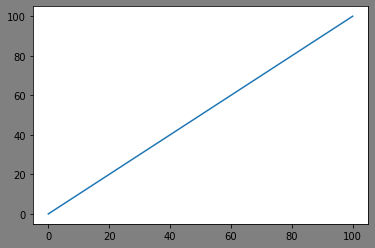

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

data = np.arange(0,101)        # Compute data points that need to be plotted
plt.figure(facecolor='gray')   # Canvas background is gray
plt.plot(data)                 # Draw a line chart
plt.show()

We can also create multiple subplots within the same figure using `matplotlib`

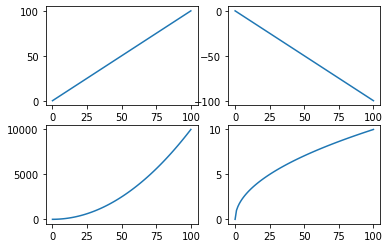

In [ ]:
# Create multiple subgraphs
nums=np.arange(0,101)
fig,axes=plt.subplots(2,2)          # Set up a subplot grid with 2 rows and 2 columns
ax1=axes[0,0]                       # Assign different variable names to each subplot
ax2=axes[0,1]
ax3=axes[1,0]
ax4=axes[1,1]
ax1.plot(nums,nums)
ax2.plot(nums,-nums)
ax3.plot(nums,nums**2)
ax4.plot(nums,np.sqrt(nums))
plt.show()

You can read much more about the `subplot` function in the [documentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot).

With just a little bit of extra work we can easily plot multiple lines at once, and add a title, legend, and axis labels:

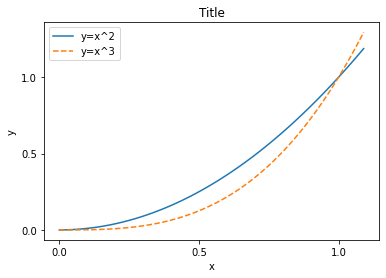

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
data=np.arange(0,1.1,0.01)
plt.title('Title')              # Add title
plt.xlabel('x')                 # Add x axis name
plt.ylabel('y')                 # Add y axis name
plt.xticks([0,0.5,1.0])    
plt.yticks([0,0.5,1.0])
plt.plot(data,data**2)
plt.plot(data,data**3, linestyle='--')  # We can change line styles or marker type
plt.legend(['y=x^2','y=x^3'])   # Add legend
plt.show()

We have sofar explored line plots, `matplotlib` also offers other plot types. For example,

### Scatter Plots

A scatter plot (also called a scatter, scatter graph, scatter chart, scatter gram, or scatter diagram) is a type of plot or mathematical diagram using Cartesian coordinates to display values for typically two variables for a set of data.

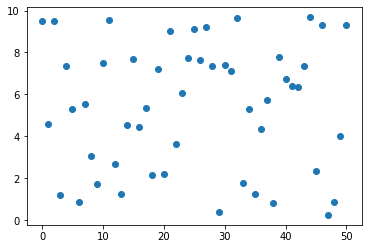

In [ ]:
x=np.arange(51)
y=np.random.rand(51)*10
plt.scatter(x,y)              # Draw a scatter plot
plt.show()

### Bar Plots

A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle and provides some indication of the uncertainty around that estimate using error bars.

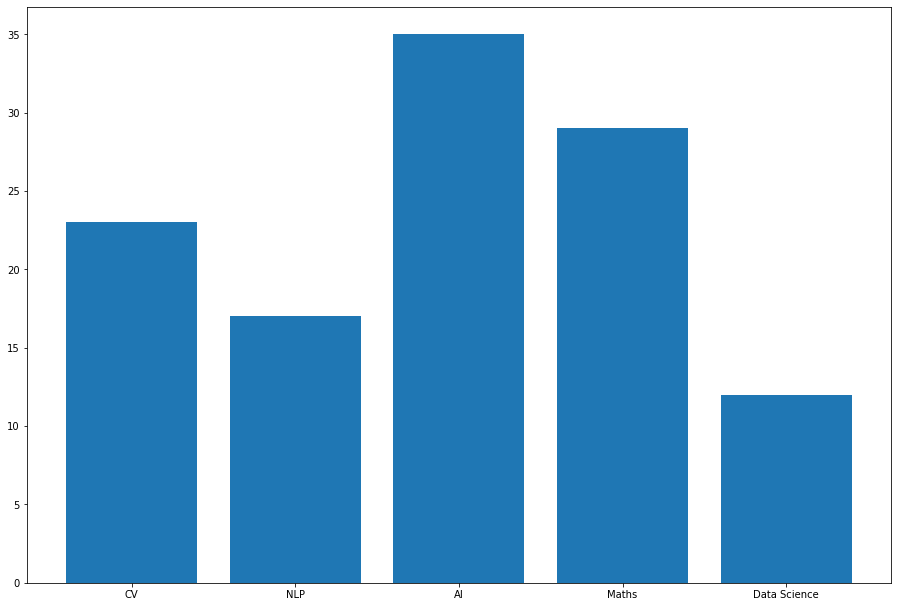

In [ ]:

fig = plt.figure()
axs = fig.add_axes([0,0,2,2])
langs = ['CV', 'NLP', 'AI', 'Maths', 'Data Science']
students = [23,17,35,29,12]
axs.bar(langs, students)
plt.show()

### Histogram

A histogram is a graphical display of data using bars of different heights. In a histogram, each bar groups numbers into ranges. Taller bars show that more data falls in that range. A histogram displays the shape and spread of continuous sample data.

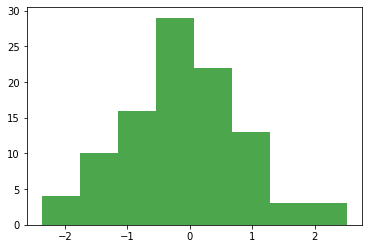

In [ ]:
arr_random = np.random.randn(100)
plt.hist(arr_random,bins=8,color='g',alpha=0.7) # Plot a histogram
                                                # alpha is the parameter to control transparency, 
                                                # bins defines the number of equal-width 
                                                # bins in the range.
plt.show()

### Different plots in a single figure using Matplotlib

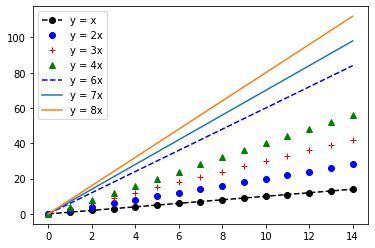

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(15)
# Syntax : plot(x, y, color='green', marker='o', linestyle='dashed'), where x and y are coordinates
plt.plot(x, x , color = 'black' , marker = 'o' , linestyle = 'dashed')
plt.plot(x, 2 * x , 'bo')  # plot with color blue and marked 'o'
plt.plot(x, 3 * x , '+r')  # plot with color red and marker '+'
plt.plot(x, 4 * x , '^g') # plot with color green and marker '^'
plt.plot(x, 6 * x , '--b') # plot with color blue and marker '--'
plt.plot(x, 7 * x)
plt.plot(x, 8 * x)
plt.legend(['y = x', 'y = 2x', 'y = 3x', 'y = 4x', 'y = 6x', 'y = 7x', 'y = 8x'], loc='upper left') # legend will appear on the top left of the figure.
plt.show()

## Scikit Image

Scikit-image is a Python package dedicated to image processing, and using natively NumPy arrays as image objects. Read image with Scikit Image and plot image with Matplotlib.

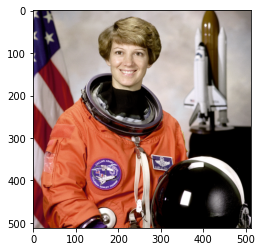

Size of image: 
(512, 512, 3) 

No. of channels: 
3


In [ ]:
# Read and Plot Image

import matplotlib.pyplot as plt
from skimage import data

img = data.astronaut()
plt.imshow(img)
plt.show()

# Dimension of image: pixels in (r,c)
img_size = img.shape
print('Size of image: \n{} \n'.format(img_size))
dim1, dim2 = img.shape[0], img.shape[1]
num_channels = img.shape[2]

# RGB Colour image has three channels: R,G,B
print('No. of channels: \n{}'.format(num_channels))

# Note: Importing images with url usinh io
# from skimage import io
# img = io.imread('url here')

## Task:

In the task 2.1 and 2.3, we used the Boston House Prices dataset. The task is to try to visualize the trands in the dataset to find a relationship between prices and other variables.

For example, you may see a strong correlation between number of rooms and price. Visualize these features using matplotlib. 


In [ ]:
from sklearn import datasets 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
loaded_data = datasets.load_boston()  # Import Boston house price dataset
data_X = loaded_data.data
data_y = loaded_data.target

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

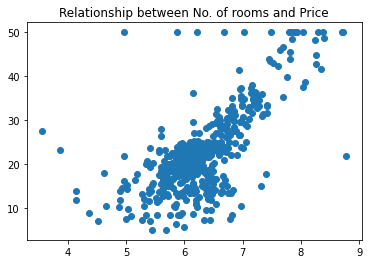

In [ ]:
# RM       average number of rooms per dwelling
rm_feat = data_X[:, 5]
plt.scatter(rm_feat, data_y)
plt.title("Relationship between No. of rooms and Price")
plt.show()

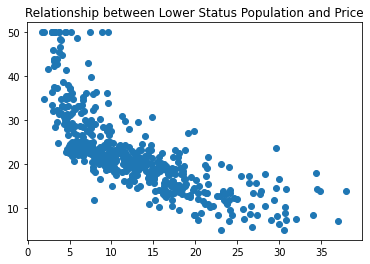

In [ ]:
# LSTAT     % lower status of the population
lstat_feat = data_X[:, -1]
plt.scatter(lstat_feat, data_y)
plt.title("Relationship between Lower Status Population and Price")
plt.show()